In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import config as conf
import data_preparation as pr
import features_extract as ex
import features_generator as fg

In [7]:
# DATA PREPARATION
train_events = conf.TRAIN_EVENTS
train_submissions = conf.TRAIN_SUBMISSIONS
test_events = conf.TEST_EVENTS
test_submissions = conf.TEST_SUBMISSIONS

In [8]:
# BASELINE FEATURES
# train_data =pr.data_preparation(train_events, train_submissions)
# test_data = pr.data_preparation(test_events, test_submissions)

In [ ]:
# NEW FEATURES GENERATION
train_data = fg.features_generator(train_events, train_submissions)
test_data = fg.features_generator(test_events, test_submissions)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19234 entries, 1 to 26798
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   discovered       19234 non-null  int64  
 1   viewed           19234 non-null  int64  
 2   started_attempt  19234 non-null  int64  
 3   wrong            19234 non-null  int64  
 4   passed           19234 non-null  int64  
 5   correct          19234 non-null  int64  
 6   course_complete  19234 non-null  bool   
 7   d_1              19234 non-null  int64  
 8   d_2              19234 non-null  int64  
 9   v_1              19234 non-null  int64  
 10  v_2              19234 non-null  int64  
 11  s_1              19234 non-null  int64  
 12  s_2              19234 non-null  int64  
 13  w_1              19234 non-null  int64  
 14  w_2              19234 non-null  int64  
 15  p_1              19234 non-null  int64  
 16  p_2              19234 non-null  int64  
 17  c_1         

In [11]:
train_data.columns

Index(['discovered', 'viewed', 'started_attempt', 'wrong', 'passed', 'correct',
       'course_complete', 'd_1', 'd_2', 'v_1', 'v_2', 's_1', 's_2', 'w_1',
       'w_2', 'p_1', 'p_2', 'c_1', 'c_2', 'd_ratio', 'v_ratio', 's_ratio',
       'w_ratio', 'p_ratio', 'c_ratio'],
      dtype='object')

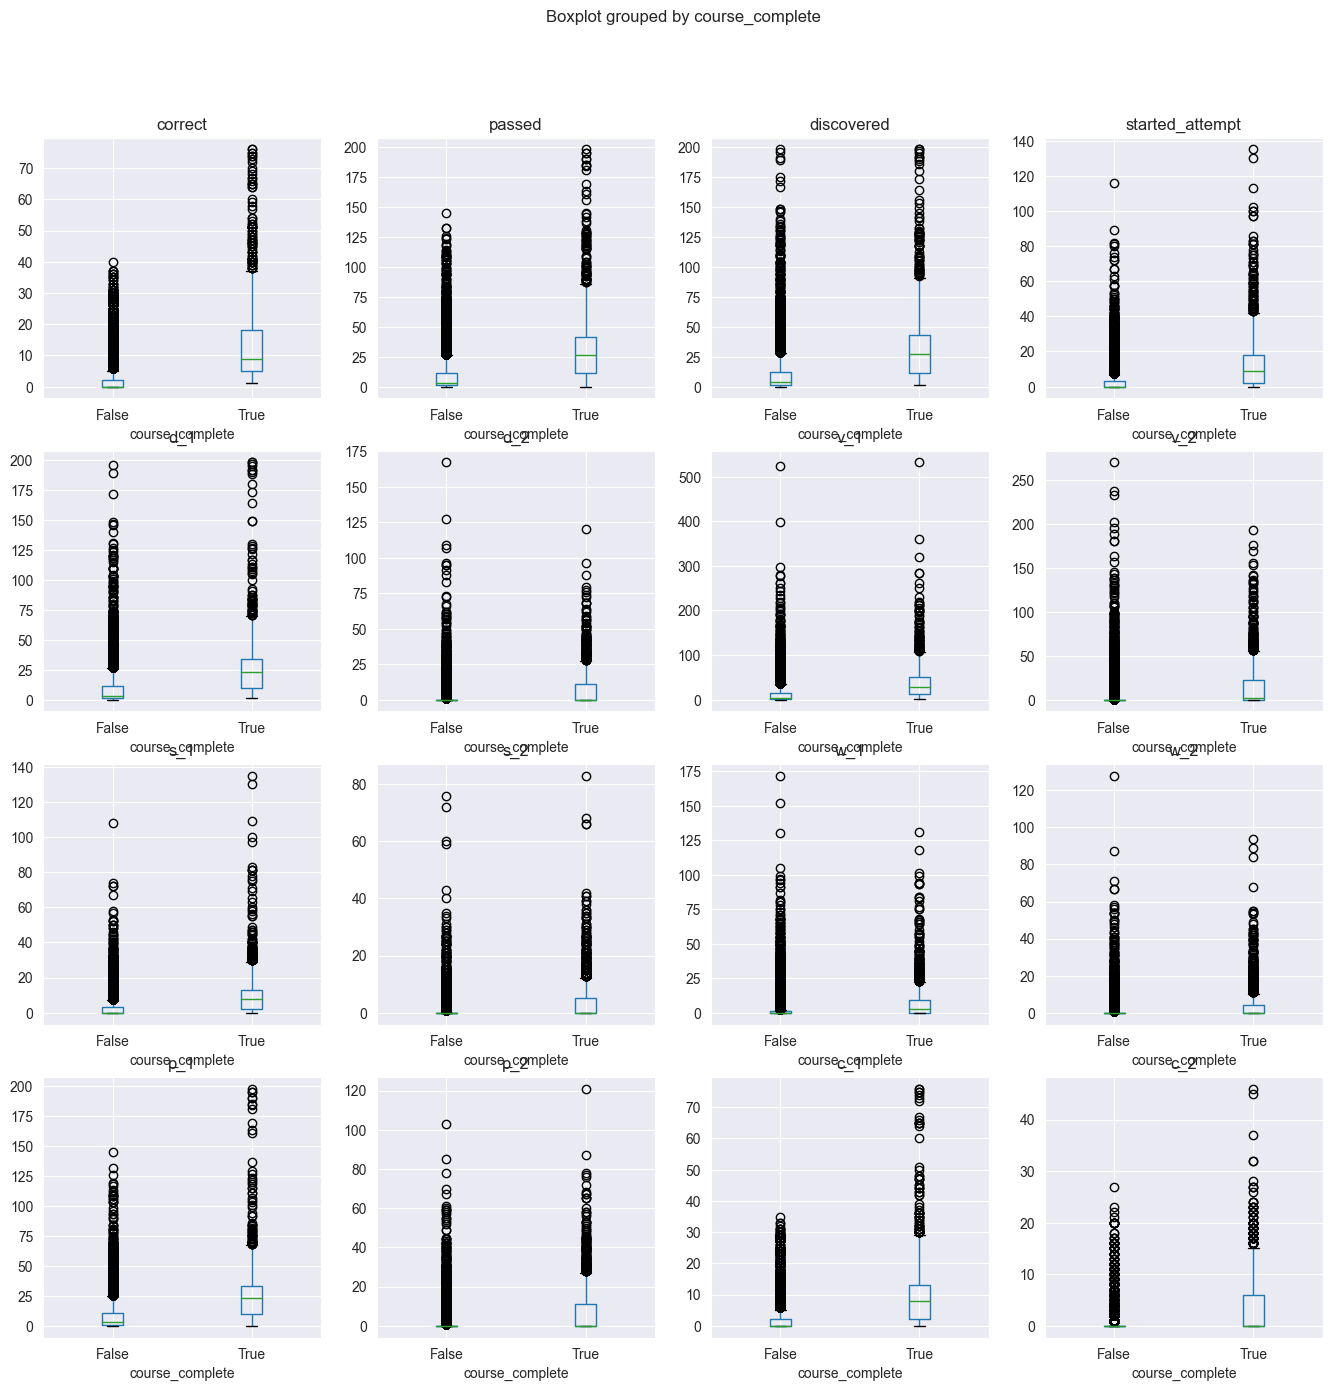

In [27]:
figure, ax = plt.subplots(4, 4, figsize=(16, 16))
train_data.boxplot('correct', by='course_complete', grid=True, ax=ax[0, 0])
train_data.boxplot('passed', by='course_complete', grid=True, ax=ax[0, 1])
train_data.boxplot('discovered', by='course_complete', grid=True, ax=ax[0, 2])
train_data.boxplot('started_attempt', by='course_complete', grid=True, ax=ax[0, 3])
train_data.boxplot('d_1', by='course_complete', grid=True, ax=ax[1, 0])
train_data.boxplot('d_2', by='course_complete', grid=True, ax=ax[1, 1])
train_data.boxplot('v_1', by='course_complete', grid=True, ax=ax[1, 2])
train_data.boxplot('v_2', by='course_complete', grid=True, ax=ax[1, 3])
train_data.boxplot('s_1', by='course_complete', grid=True, ax=ax[2, 0])
train_data.boxplot('s_2', by='course_complete', grid=True, ax=ax[2, 1])
train_data.boxplot('w_1', by='course_complete', grid=True, ax=ax[2, 2])
train_data.boxplot('w_2', by='course_complete', grid=True, ax=ax[2, 3])
train_data.boxplot('p_1', by='course_complete', grid=True, ax=ax[3, 0])
train_data.boxplot('p_2', by='course_complete', grid=True, ax=ax[3, 1])
train_data.boxplot('c_1', by='course_complete', grid=True, ax=ax[3, 2])
train_data.boxplot('c_2', by='course_complete', grid=True, ax=ax[3, 3])

plt.show()

In [51]:
train_data['agg'] = train_data.discovered +  train_data.viewed +  train_data.started_attempt +  train_data.wrong +  train_data.passed +  train_data.correct + train_data.course_complete +  train_data.d_1 +  train_data.d_2 +  train_data.v_1 +  train_data.v_2 +  train_data.s_1 +  train_data.s_2 +  train_data.w_1 + train_data.w_2 +  train_data.p_1 +  train_data.p_2 +  train_data.c_1 +  train_data.c_2

In [57]:
train_data['cw_ratio'] = (train_data.correct / train_data.wrong).fillna(0)
train_data.replace([np.inf, -np.inf], 0, inplace=True)

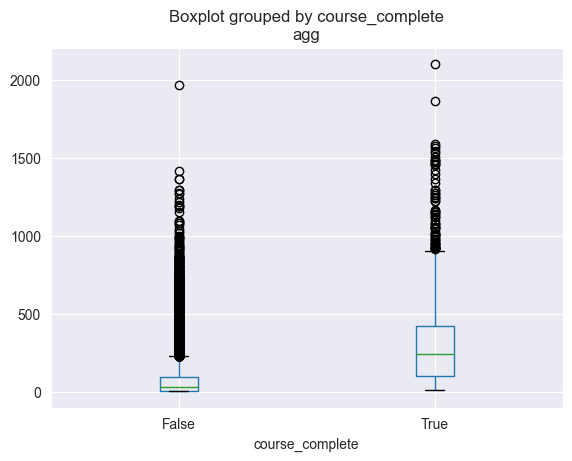

agg                                                   \
                   count        mean         std  min   25%    50%    75%   
course_complete                                                             
False            17266.0   85.259469  134.632318  2.0   6.0   30.0   94.0   
True              1968.0  310.725610  266.653093  9.0  99.0  241.0  421.0   

                         
                    max  
course_complete          
False            1964.0  
True             2101.0

In [59]:
train_data.boxplot('agg', by='course_complete', grid=True)
plt.show()

train_data[['course_complete', 'agg']].groupby('course_complete').describe()

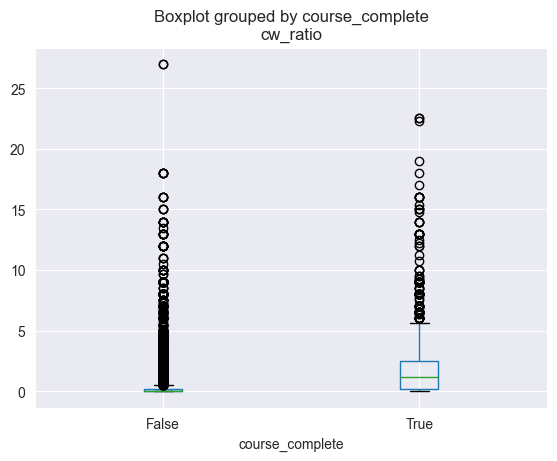

cw_ratio                                                    \
                   count      mean       std  min       25%       50%  75%   
course_complete                                                              
False            17266.0  0.513554  1.447168  0.0  0.000000  0.000000  0.2   
True              1968.0  2.000262  2.742208  0.0  0.210526  1.142857  2.5   

                       
                  max  
course_complete        
False            27.0  
True             22.5

In [58]:
train_data.boxplot('cw_ratio', by='course_complete', grid=True)
plt.show()

train_data[['course_complete', 'cw_ratio']].groupby('course_complete').describe()

In [74]:
train_data[(train_data.course_complete == True) & (train_data.c_2 >= 0)].describe()

,discovered,viewed,started_attempt,wrong,passed,correct,d_1,d_2,v_1,v_2,...,c_1,c_2,d_ratio,v_ratio,s_ratio,w_ratio,p_ratio,c_ratio,agg,cw_ratio
count,1968.000000,1968.000000,1968.00000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,...,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,32.708841,52.488821,13.43750,11.075711,31.755589,13.396341,25.369919,7.338923,37.776931,14.711890,...,9.940549,3.455793,2.163640,3.274305,1.200566,0.821045,2.135274,1.284036,310.725610,2.000262
std,28.025137,49.732225,14.64309,16.906389,27.386884,11.937961,22.702410,12.173691,37.714235,23.436267,...,9.482868,5.379930,4.935552,11.025128,3.215533,2.596806,4.923238,2.721055,266.653093,2.742208
min,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,11.000000,15.000000,2.00000,1.000000,11.000000,5.000000,10.000000,0.000000,12.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.210526
50%,27.000000,40.000000,9.00000,5.000000,26.000000,9.000000,23.000000,0.000000,29.000000,2.000000,...,8.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,241.000000,1.142857
75%,43.000000,71.000000,18.00000,14.000000,41.000000,18.000000,34.000000,11.000000,50.000000,22.000000,...,13.000000,6.000000,2.333333,2.222222,1.250000,0.500000,2.338235,1.545455,421.000000,2.500000
max,198.000000,568.000000,135.00000,173.000000,198.000000,76.000000,198.000000,120.000000,532.000000,193.000000,...,76.000000,46.000000,59.000000,262.000000,63.000000,46.500000,92.000000,36.000000,2101.000000,22.500000


In [75]:
train_data[(train_data.course_complete == False) & (train_data.c_2 >= 0)].describe()

,discovered,viewed,started_attempt,wrong,passed,correct,d_1,d_2,v_1,v_2,...,c_1,c_2,d_ratio,v_ratio,s_ratio,w_ratio,p_ratio,c_ratio,agg,cw_ratio
count,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,...,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000,17266.000000
mean,10.046044,15.442430,3.046566,2.469014,9.087687,2.537994,8.897313,1.148732,12.873451,2.568979,...,2.202537,0.335457,0.525092,0.938177,0.229094,0.152153,0.506855,0.217751,85.259469,0.513554
std,14.846562,26.904929,6.035720,8.204976,13.300835,4.772772,12.492576,5.205569,21.018837,10.948592,...,3.992831,1.555630,2.831583,4.947515,1.369885,1.459123,2.676155,1.205050,134.632318,1.447168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.000000,5.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
75%,12.000000,17.000000,3.000000,1.000000,11.000000,2.000000,11.000000,0.000000,15.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.200000
max,198.000000,524.000000,116.000000,184.000000,145.000000,40.000000,196.000000,167.000000,524.000000,270.000000,...,35.000000,27.000000,70.000000,218.000000,44.000000,91.000000,62.000000,29.000000,1964.000000,27.000000


In [ ]:
# boxplot для понимания разброса по фичам с группировкой сдал не сдал

In [ ]:
# взаимосвязь между переменными

In [ ]:
# Убедимся, что нет выбросов
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
df.boxplot('expr', by='dose', grid=True, ax=ax1)
df.boxplot('expr', by='age', grid=True, ax=ax2)
plt.show()